# MSE (Mean Squared Error)

#### What is the MSE?  
> The MSE is a real world cost function. 

#### How do we calculate it?
> To get the MSE we take the RSS and divide it by the numbe of data points.

#### Why use it?
Some considerations for the use of MSE: 

* The goal of linear regression is to minimise the distances between the points (datapoints) and the line (known as the RSS). 
* A good line is one the reduces/minimises the RSS (residual sum of squares). 
* To calculate the RSS we should take the difference between actual value and fitted value (datapoints and line) and sum them. * values below the line would therefore have a negative value. To mitigate we _square_ all the values and sum them.

In summary it's a indicator of the dependant variables variation that the model does not explain. The smaller the number the better the model fits the data. Large numbers are a poor fit.

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# add support for 3d plot
from mpl_toolkits.mplot3d.axes3d import Axes3D

# add support for colormaps 
from matplotlib import cm

# add additional mathematical support
# from sympy import symbols, diff
# from math import log

# add ML libs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## MSE - A cost function for regression problems 

#### $RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2$

The MSE has two typical notations:

#### $MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2$

#### $MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2$

Why is the MSE moe useful as a cost function than the RSS? 

* In a large dataset using the RSS would result in a $y$ and $\hat{y}$ value for each data point. 
* With RSS further or exponential data growth would lead to the sum growing accordingly. 
* Using RSS would mean performance would be extremely poor, eventually we would have an overflow error. 
* The MSE is contantly dividing by the number of samples therefor we have a better all round scalability and performance. 

In [16]:
# Make the sample data 
x = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1)

In [19]:
# run a linearRegressin
reg = LinearRegression()
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# finding the theta0 and theta1
print('Theta0: ', reg.intercept_[0])
print('Theta1: ', reg.coef_[0][0])

Theta0:  0.8475351486029536
Theta1:  1.2227264637835915


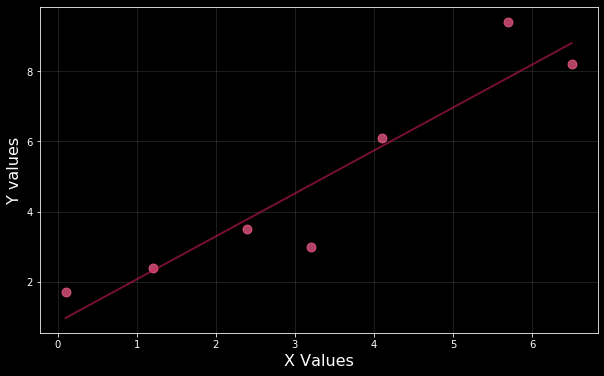

In [33]:
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
plt.grid(color='w', alpha=0.15)

plt.xlabel('X Values', fontsize=16)
plt.ylabel('Y values', fontsize=16)

plt.scatter(x, y, s=80, color='#ff6090', alpha=0.7)
plt.plot(x, reg.predict(x), color='#e91e63', alpha=0.5, linewidth=2);

## Implementing the MSE cost function

###  $\hat{y} = theta0 + theta1 * x$

This means that the $\hat{y}$ = the intercept + the slope * the X value

In [37]:
yh = 0.8475351486029536 + 1.2227264637835915 * x
print('yhat values: \n', yh)
print('actual Y values: \n', y)

yhat values: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
actual Y values: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


#### Versions of the MSE function

In [50]:
# version 1 - the specific manual calculation

# def mse(y, yh):
#     mse_calc = 1/7 * sum((y - yh)**2)          # specific and low reusage 
#     return mse_calc

In [ ]:
# version 2 - The manual calculation made generic for reuse 

# def mse(y, yh):
#     mse_calc = 1/y.size * sum((y - yh)**2)     # more generic as using the .size
#     return mse_calc

In [44]:
# version 3 - use the numpy built-in functions and use axis=0 to drive agregation by row. 
def mse(y, yh):
    mse_calc = np.average((y - yh)**2, axis=0)  # uses numpy to do the work and axis = 0 uses the rows as the driver
    return mse_calc

In [49]:
print('Manually calculated MSE: ', mse(y, yh))                              # uses verson 3 of our own cooked function 
print('sklearn MSE using calc yhat', mean_squared_error(y, yh))             # uses sklearn 
print('sklearn MSE using predict', mean_squared_error(y, reg.predict(x)))   # sklearn and model.predict 

Manually calculated MSE:  [0.94796558]
sklearn MSE using calc yhat 0.9479655759794577
sklearn MSE using predict 0.9479655759794577


 ## Visualisation of the MSE 

In [65]:
# make the data for the thetas 
nr_thetas = 200

# create some one dimensional arrays 
th0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th1 = np.linspace(start=-1, stop=3, num=nr_thetas)

In [66]:
# create the tw dimensional array using np.meshgrid 
plot_th0, plot_th1 = np.meshgrid(th0, th1)

In [67]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        yh = plot_th0[i][j] + plot_th1[i][j] * x
        plot_cost[i][j] = mse(y, yh)

In [68]:
# view the cost struct created 
plot_cost

array([[108.51285714, 108.14283763, 107.77362617, ...,  51.2194266 ,
         51.00859498,  50.79857143],
       [106.88158925, 106.51424787, 106.14771456, ...,  50.11575289,
         49.90759941,  49.700254  ],
       [105.262904  , 104.89824077, 104.5343856 , ...,  49.02466182,
         48.81918649,  48.61451922],
       ...,
       [ 30.0738157 ,  30.23139037,  30.38977309, ...,  76.71643873,
         77.03320129,  77.35077191],
       [ 30.92133081,  31.08158362,  31.24264449, ...,  78.09154801,
         78.41098872,  78.73123749],
       [ 31.78142857,  31.94435952,  32.10809853, ...,  79.47923995,
         79.8013588 ,  80.12428571]])

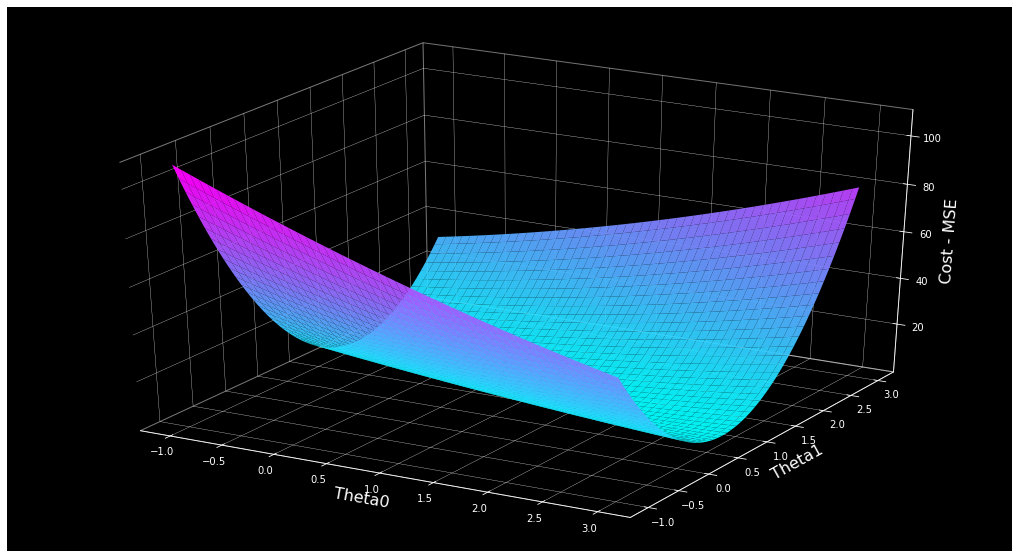

In [102]:
fig = plt.figure(figsize=[18,10])
ax = fig.gca(projection='3d')

# set the labels 
ax.set_xlabel('Theta0', fontsize=16)
ax.set_ylabel('Theta1', fontsize=16)
ax.set_zlabel('Cost - MSE', fontsize=16)

# set the plots grid styling
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# reduce the default plot linewidths as they
# are quite stark and unpleasant in a dark
# background setting. 
ax.xaxis._axinfo["grid"]['linewidth'] = 0.3
ax.yaxis._axinfo["grid"]['linewidth'] = 0.3
ax.zaxis._axinfo["grid"]['linewidth'] = 0.3

# plot 
ax.plot_surface(plot_th0, plot_th1, plot_cost, cmap=cm.cool, alpha=0.95);

In [107]:
print('min value of plot_cost: ', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i, j): ', ij_min)
print('Min MSE for Theta0[111][91] is:', plot_th0[111][91])
print('Min MSE for Theta1[111][91] is:', plot_th1[111][91])

min value of plot_cost:  0.9483826526747164
Min occurs at (i, j):  (111, 91)
Min MSE for Theta0[111][91] is: 0.829145728643216
Min MSE for Theta1[111][91] is: 1.2311557788944723


## Calculate the Partial Derivatives for the Gadient Descent with $\theta_0$  and  $\theta_1$

### $\frac {\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 -\theta_1 x^{(i)} \big) $

### $\frac {\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 -\theta_1 x^{(i)} \big) \big( x^ {(i)} \big) $



In [112]:
# x vals, y vals, array of theta parameters (theta0 at index0 and theta1 at index 1)
def grad(x,y, thetas):
    n = y.size 
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1] * x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1] * x)*x)
    
    return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)  # alternate return option 

In [114]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# collect data poit for the scatter plot 
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y, thetas[0] + thetas[1] * x)

for i in range(1000):
    thetas = thetas - multiplier * grad(x, y, thetas)
    
    # apped new vals to np arrays 
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.concatenate((mse_vals, mse(y, thetas[0] + thetas[1] * x)), axis=0)

# results 
print('Min occurs at Theta0: ', thetas[0])
print('Min occurs at Theta1: ', thetas[1])
print('MSE is: ', mse(y, thetas[0] + thetas[1] * x))

Min occurs at Theta0:  0.8532230461743415
Min occurs at Theta1:  1.2214935332607393
MSE is:  [0.94797511]


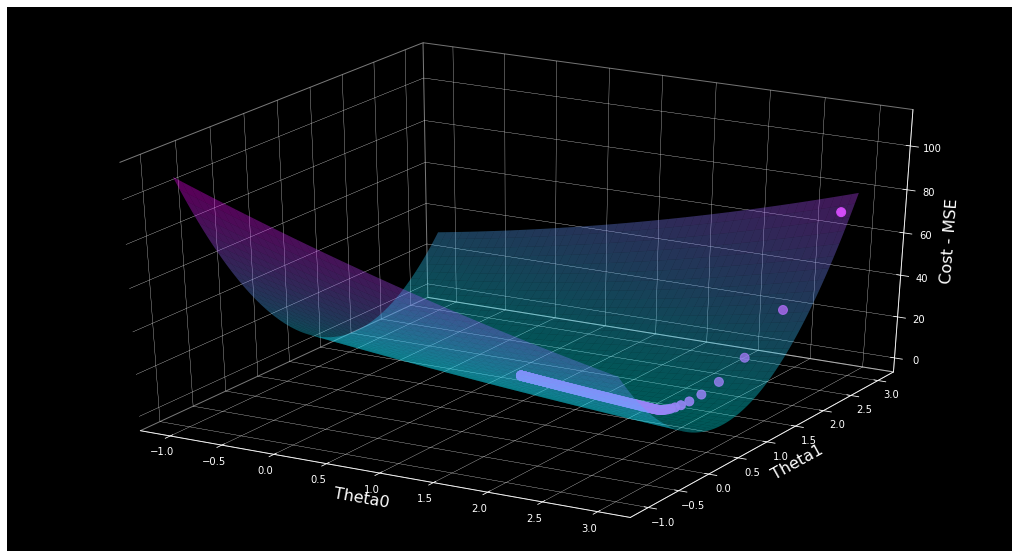

In [120]:
fig = plt.figure(figsize=[18,10])
ax = fig.gca(projection='3d')

# set the labels 
ax.set_xlabel('Theta0', fontsize=16)
ax.set_ylabel('Theta1', fontsize=16)
ax.set_zlabel('Cost - MSE', fontsize=16)

# set the plots grid styling
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# reduce the default plot linewidths as they
# are quite stark and unpleasant in a dark
# background setting. 
ax.xaxis._axinfo["grid"]['linewidth'] = 0.3
ax.yaxis._axinfo["grid"]['linewidth'] = 0.3
ax.zaxis._axinfo["grid"]['linewidth'] = 0.3

# plot 
ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='#e449f2')
ax.plot_surface(plot_th0, plot_th1, plot_cost, cmap=cm.cool, alpha=0.35);